<a href="https://colab.research.google.com/github/DeepthiManthapuram/Anomaly_detection/blob/main/Anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
!pip install ucimlrepo


In [5]:
from ucimlrepo import fetch_ucirepo

# Fetch Air Quality dataset
air_quality = fetch_ucirepo(id=360)

# Features
data = air_quality.data.features

data.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888


In [6]:
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

In [7]:
df = data[['CO(GT)', 'C6H6(GT)','NOx(GT)', 'NO2(GT)']]
df.head()

,CO(GT),C6H6(GT),NOx(GT),NO2(GT)
0,2.6,11.9,166,113
1,2.0,9.4,103,92
2,2.2,9.0,131,114
3,2.2,9.2,172,122
4,1.6,6.5,131,116


In [8]:
df.isna().sum()

,0
CO(GT),0
C6H6(GT),0
NOx(GT),0
NO2(GT),0


In [9]:
df.isnull().sum()

,0
CO(GT),0
C6H6(GT),0
NOx(GT),0
NO2(GT),0


In [10]:
df.dtypes

,0
CO(GT),float64
C6H6(GT),float64
NOx(GT),int64
NO2(GT),int64


In [11]:
df.shape

(9357, 4)

In [12]:
#parameters for isolation forest

n_estimators = 100  #no of trees in the forest
contamination = 0.01 #% of outliers in data
sample_size = 256

In [17]:
#train isolation forest model
from sklearn.ensemble import IsolationForest
model = IsolationForest(n_estimators = n_estimators,
                        contamination = contamination,
                        max_samples = sample_size,
                        random_state = 42
                        )

#-1 for anomaly and 0 for normal point

In [30]:
model.fit(df)

#predict anomalies
anomaly_labels = model.predict(df)

#add anomaly labels to the dataframe
df['anomaly'] = anomaly_labels
df['anomaly']

,anomaly
0,1
1,1
2,1
3,1
4,1
...,...
9352,1
9353,1
9354,1
9355,1


In [32]:
df['anomaly'].value_counts()

,count
anomaly,
1,9263
-1,94


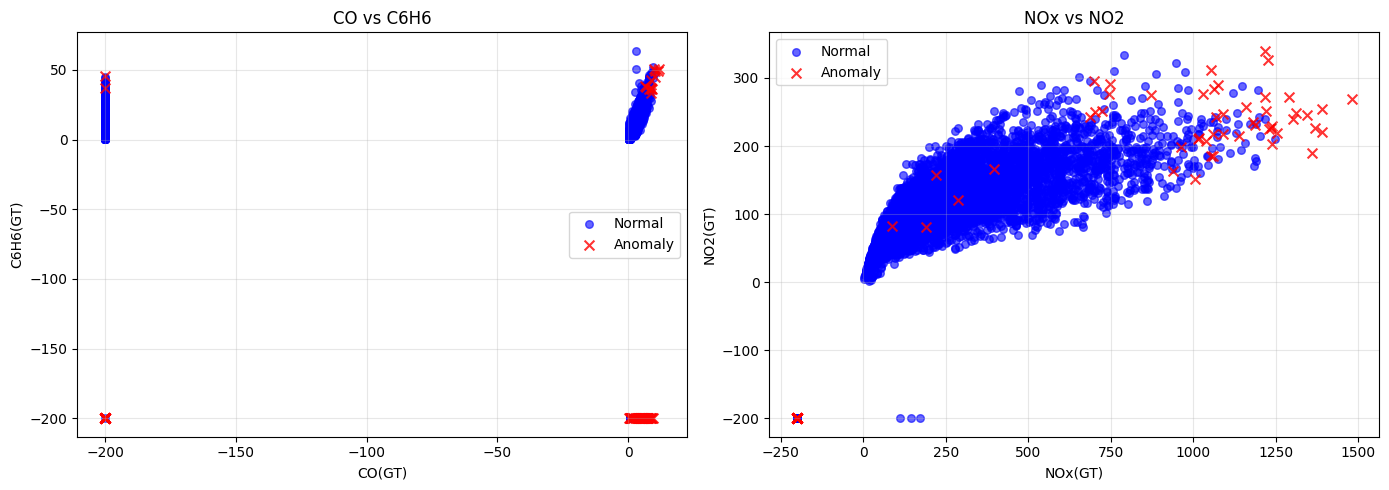

Normal data points: 9263
Anomalies detected: 94


In [36]:
# Visualize anomalies - Multiple feature comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

normal = df[df['anomaly'] == 1]
anomaly = df[df['anomaly'] == -1]

# Plot 1: CO vs C6H6
axes[0].scatter(normal['CO(GT)'], normal['C6H6(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[0].scatter(anomaly['CO(GT)'], anomaly['C6H6(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[0].set_xlabel('CO(GT)')
axes[0].set_ylabel('C6H6(GT)')
axes[0].set_title('CO vs C6H6')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: NOx vs NO2
axes[1].scatter(normal['NOx(GT)'], normal['NO2(GT)'], color='blue', label='Normal', alpha=0.6, s=30)
axes[1].scatter(anomaly['NOx(GT)'], anomaly['NO2(GT)'], color='red', label='Anomaly', alpha=0.8, s=50, marker='x')
axes[1].set_xlabel('NOx(GT)')
axes[1].set_ylabel('NO2(GT)')
axes[1].set_title('NOx vs NO2')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Normal data points: {len(normal)}")
print(f"Anomalies detected: {len(anomaly)}")